In [1]:
import pandas as pd
import spoontacular as sp
# Read in api key from file
with open('api_key.txt', 'r') as f:
    api_key = f.read()

## Hypotheses
1. Desserts are sweet, Indian food is spicy, Sea food is salty, meat is fatty
2. Sweet and sour foods are actually a lot sweeter than sour
3. US Regions have a particular taste (East Coast, MidWest, West Coast)


In [2]:
# Desserts are sweet, Indian food is spicy, sea food is salty, meat is fatty, and vegetables are savory
search = ['desserts', 'indian', 'sea food', 'meat', 'vegetable']
recipes = []
for search_term in search:
    df = sp.get_recipe(search_term, api_key, number=50)
    print(len(df))
    df['type'] = search_term
    recipes.append(df)
recipes = pd.concat(recipes)


50
50
50
50
50


In [3]:
# Get taste profile from spoonacular
recipes['taste_profile'] = recipes['id'].apply(lambda row: sp.get_taste(row, api_key))

In [4]:
# Extract flavors from taste profile
flavors = ['sweetness','saltiness','sourness','bitterness','savoriness','fattiness','spiciness']
recipeswithflavor = recipes.copy()
for falvor in flavors:
    recipeswithflavor[falvor] = recipes['taste_profile'].apply(lambda row: row[falvor])


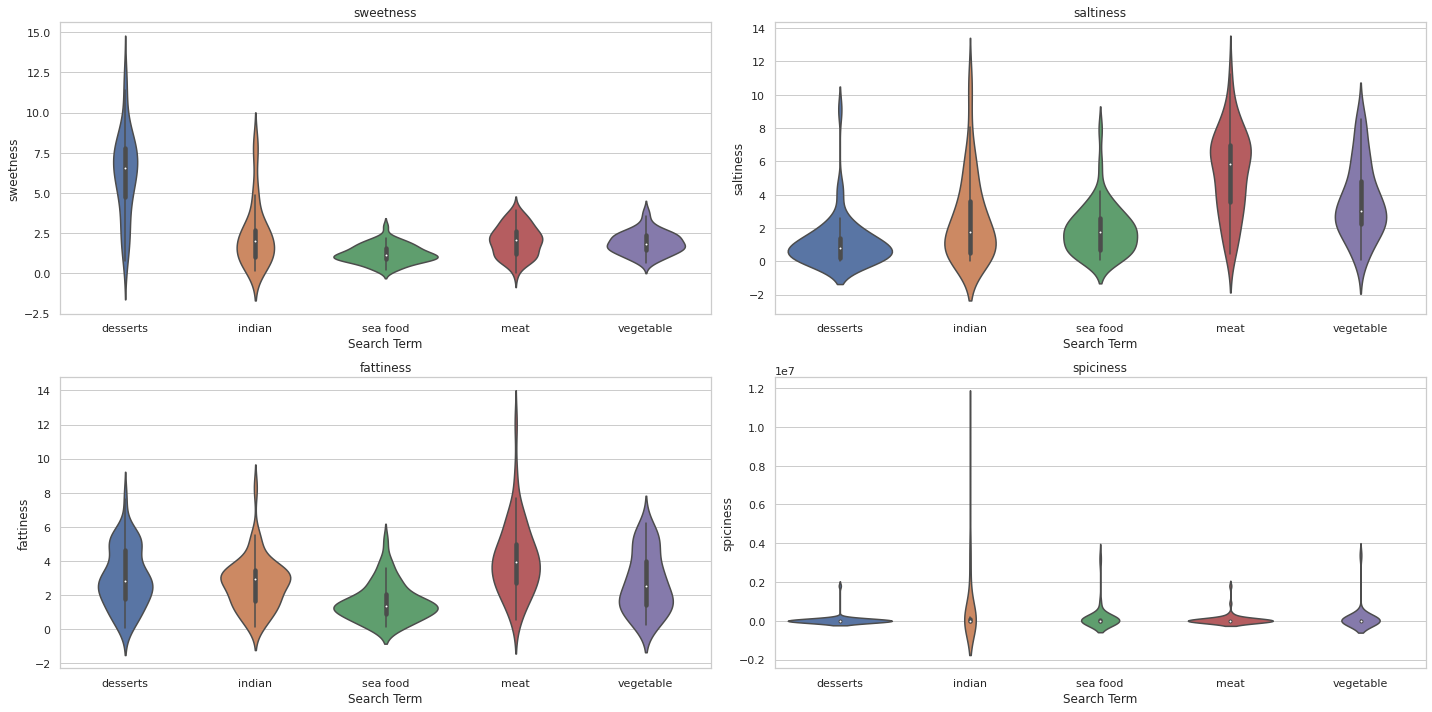

In [5]:
# 25 Violins plots
# Show the distribution of each flavor
# for flavor in flavors
# 5 plots side-by-side
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
# Create subplots of the 4 selected flavors
selected_flavors = ['sweetness', 'saltiness', 'fattiness', 'spiciness']
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for i, flavor in enumerate(selected_flavors):
    sns.violinplot(x='type', y=flavor, data=recipeswithflavor, ax=ax[i//2, i%2])
    ax[i//2, i%2].set_title(flavor)
    # Change x-axis label to be "Search Term"
    ax[i//2, i%2].set_xlabel('Search Term')
plt.tight_layout()
plt.show()

## 2. Sweet and sour foods are actually a lot sweeter than sour

In [6]:
sweet_and_sour = sp.get_recipe('sweet and sour', api_key, number=100)
sweet_and_sour['taste_profile'] = sweet_and_sour['id'].apply(lambda row: sp.get_taste(row, api_key))
sweet_and_sourwithflavor = sweet_and_sour.copy()
for falvor in flavors:
    sweet_and_sourwithflavor[falvor] = sweet_and_sour['taste_profile'].apply(lambda row: row[falvor])

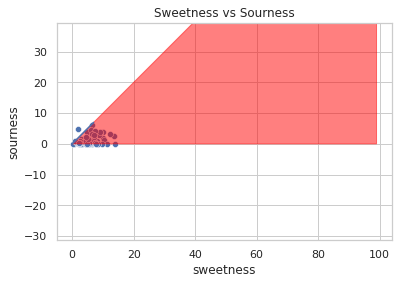

In [ ]:
# Create a scatterplot of sweet vs sour 
sns.scatterplot(x='sweetness', y='sourness', data=sweet_and_sourwithflavor)
# Add a 1:1 line
plt.plot(range(0, 8), range(0, 8))
# Fill in everything below the line with a color
plt.fill_between(range(0, 100), range(0, 100), color='red', alpha=0.5)
# Keep the axises at the same scale
# Y axis limit to 8
plt.ylim(0, 8)
plt.xlim
plt.title('Sweetness vs Sourness')
plt.show()

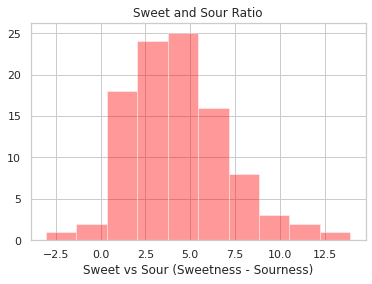

In [ ]:
sweet_and_sourwithflavor['Sweetness vs Sourness'] = sweet_and_sourwithflavor['sweetness'] - sweet_and_sourwithflavor['sourness']
# Create histogram of Sweet and Sour Ratio
# If sweet vs sour is less than 0, make it green
# If sweet vs sour is greater than 0, make it red
sns.distplot(sweet_and_sourwithflavor['Sweetness vs Sourness'], bins=10, kde=False, color='green' if sweet_and_sourwithflavor['Sweet and Sour Ratio'].mean() < 0 else 'red')
plt.title('Sweet and Sour Ratio')
plt.xlabel("Sweet vs Sour (Sweetness - Sourness)")
plt.show()